In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
mpl.rcParams['font.family'] = "malgun gothic"
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['axes.titlesize'] = 20

In [3]:
np.random.seed(0)
tf.random.set_seed(0)

#### 학습결과 시각화 함수

In [4]:
def plot_loss(epochs, history):
    """
    학습 loss를 시각화 하는 함수
    """
    plt.figure(figsize=(8,7))
    plt.plot(range(1, epochs+1), history.history['loss'], label='Train Loss')
    plt.plot(range(1, epochs+1), history.history['val_loss'], label='Validation Loss')
    plt.title("Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()    

In [5]:
def plot_accuracy(epochs, history):
    """
    학습 Accuracy를 시각화 하는 함수
    """
    plt.figure(figsize=(8,7))
    plt.plot(range(1, epochs+1), history.history['accuracy'], label='Train Accuracy')
    plt.plot(range(1, epochs+1), history.history['val_accuracy'], 
                                                 label='Validation Accuracy')
    plt.title("Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()  

#### 데이터 로딩

In [6]:
(train_image, train_label), (test_image, test_label) = keras.datasets.mnist.load_data()

In [7]:
train_image.shape, test_image.shape

((60000, 28, 28), (10000, 28, 28))

#### 하이퍼파라미터 변수 정의

In [8]:
LEARNING_RATE = 0.001
N_EPOCHS = 20
N_BATCHS = 100

# 데이터 개수
N_TRAIN = train_image.shape[0]
N_TEST = test_image.shape[0]

#### 전처리
- image : 0 ~ 1 사이의 값으로 정규화
- label : one hot encoding (다중분류문제이므로)

In [9]:
X_train = (train_image/255.0).astype("float32")
X_test = (test_image/255.0).astype('float32')

In [10]:
y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

In [11]:
#확인
np.min(X_train), np.max(X_train), np.min(X_test), np.max(X_test)

(0.0, 1.0, 0.0, 1.0)

In [12]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

#### Dataset 생성

In [13]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
                               .shuffle(N_TRAIN)\
                               .batch(N_BATCHS)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))\
                              .batch(N_BATCHS)

# 모델의 크기 변경

In [14]:
# 작은 모델
def create_small_model():
    #모델생성
    model = keras.Sequential()
    # 레이어 추가 - Hidden
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(units=8, activation='relu'))
    # 출력레이어
    model.add(layers.Dense(units=10, activation='softmax'))
    return model

In [16]:
# 모델 생성, 컴파일
small_model =  create_small_model()
small_model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [17]:
small_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 6280      
                                                                 
 dense_3 (Dense)             (None, 10)                90        
                                                                 
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


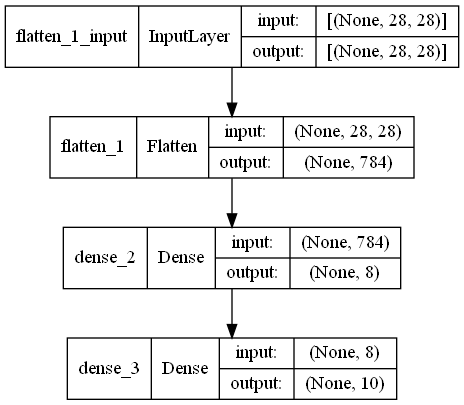

In [18]:
keras.utils.plot_model(small_model, show_shapes=True)

In [19]:
hist = small_model.fit(train_dataset, epochs=N_EPOCHS, 
                       validation_data=test_dataset)

Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 0.8624 - accuracy: 0.7400 - val_loss: 0.4291 - val_accuracy: 0.8833
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.3977 - accuracy: 0.8875 - val_loss: 0.3442 - val_accuracy: 0.9017
Epoch 3/20
600/600 [==============================] - 3s 4ms/step - loss: 0.3420 - accuracy: 0.9042 - val_loss: 0.3125 - val_accuracy: 0.9144
Epoch 4/20
600/600 [==============================] - 3s 4ms/step - loss: 0.3169 - accuracy: 0.9118 - val_loss: 0.3020 - val_accuracy: 0.9150
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.3028 - accuracy: 0.9155 - val_loss: 0.2940 - val_accuracy: 0.9194
Epoch 6/20
600/600 [==============================] - 3s 4ms/step - loss: 0.2942 - accuracy: 0.9181 - val_loss: 0.2935 - val_accuracy: 0.9176
Epoch 7/20
600/600 [==============================] - 3s 5ms/step - loss: 0.2881 - accuracy: 0.9201 - val_loss: 0.2869 - val_accuracy: 0.9199
Epoch 

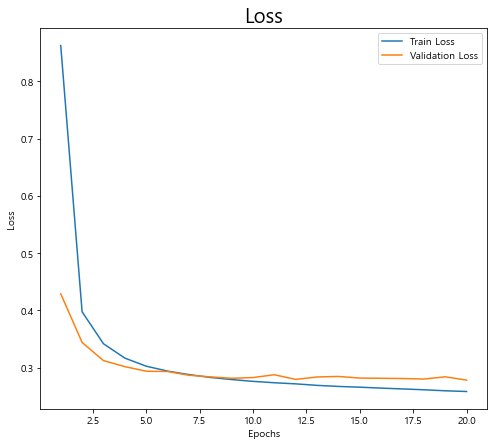

In [20]:
plot_loss(N_EPOCHS, hist)

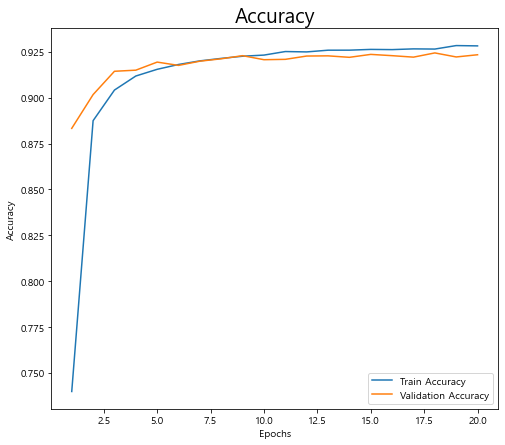

In [21]:
plot_accuracy(N_EPOCHS, hist)

In [23]:
# 모델의 크기를 크게
# MLP - units 개수 : 2제곱, 큰값에서 점점 줄여나간다.
def create_bigger_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(units=256, activation='relu'))
    model.add(layers.Dense(units=256, activation='relu'))
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dense(units=128, activation='relu'))
    #출력
    model.add(layers.Dense(units=10, activation='softmax'))
    return model

In [24]:
bigger_model = create_bigger_model()
bigger_model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

In [25]:
bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 317,450
Trainable params: 317,450
Non-tr

In [27]:
hist = bigger_model.fit(train_dataset, 
                        epochs=N_EPOCHS, 
                        validation_data=test_dataset)

Epoch 1/20
600/600 [==============================] - 7s 9ms/step - loss: 0.2464 - accuracy: 0.9264 - val_loss: 0.1270 - val_accuracy: 0.9579
Epoch 2/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0943 - accuracy: 0.9704 - val_loss: 0.0968 - val_accuracy: 0.9697
Epoch 3/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0657 - accuracy: 0.9795 - val_loss: 0.0846 - val_accuracy: 0.9741
Epoch 4/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0490 - accuracy: 0.9841 - val_loss: 0.0741 - val_accuracy: 0.9770
Epoch 5/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0401 - accuracy: 0.9869 - val_loss: 0.0760 - val_accuracy: 0.9785
Epoch 6/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0318 - accuracy: 0.9899 - val_loss: 0.0756 - val_accuracy: 0.9788
Epoch 7/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0292 - accuracy: 0.9907 - val_loss: 0.0752 - val_accuracy: 0.9785


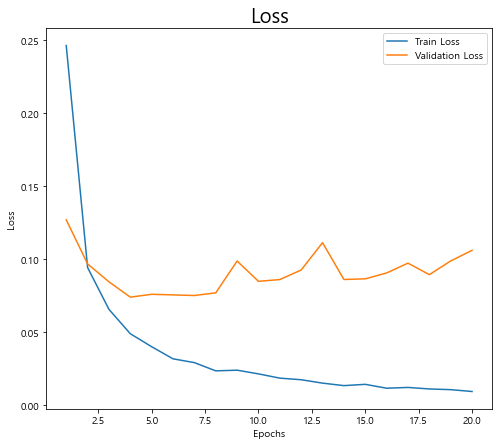

In [28]:
plot_loss(N_EPOCHS, hist)

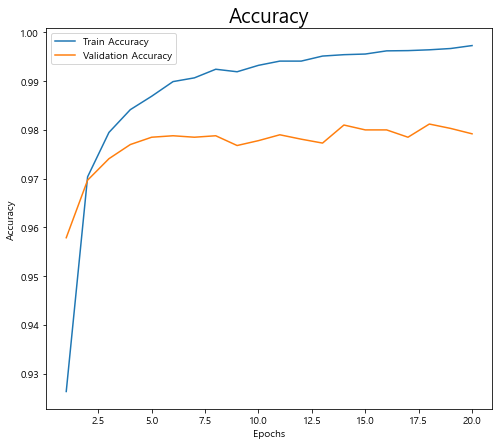

In [29]:
plot_accuracy(N_EPOCHS, hist)